<a href="https://colab.research.google.com/github/DataPionner/log-regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("loan_data_set.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [5]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df[df['Gender'].isna()==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [8]:
df[df['Married'].isna()==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [9]:
df[df['Dependents'].isna()==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [10]:
df[df['Self_Employed'].isna()==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [11]:
df[df['LoanAmount'].isna()==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [12]:
df[df['Loan_Amount_Term'].isna()==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [13]:
df[df['Credit_History'].isna()==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [14]:
df['Gender'] = df['Gender'].fillna(0)
df['Married'] = df['Married'].fillna(0)
df['Dependents'] = df['Dependents'].fillna(0)
df['Self_Employed'] = df['Self_Employed'].fillna(0)
df['LoanAmount'] = df['LoanAmount'].fillna(0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(0)
df['Credit_History'] = df['Credit_History'].fillna(0)

In [15]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.dropna(inplace=True)


In [16]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.dropna(axis=1, inplace=True)


In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df=df[df['Property_Area']!='Rural']

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [20]:
df['Property_Area']=df['Property_Area'].map({'Urban':0,'Semiurban':1})

<ipython-input-20-117f6b1f1699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property_Area']=df['Property_Area'].map({'Urban':0,'Semiurban':1})


In [21]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

<ipython-input-21-68bf9ec459ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].map({'Male':0,'Female':1})


In [22]:
df['Married']=df['Married'].map({'No':0,'Yes':1})

<ipython-input-22-5c24dfa4ce96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']=df['Married'].map({'No':0,'Yes':1})


In [23]:
df['Education']=df['Education'].map({'Not Graduate':0,'Graduate':1})

In [24]:
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})

In [25]:
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,0.0,360.0,1.0,0,1
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,0,1


In [27]:
df.drop(columns=["Loan_ID"], inplace=True)

In [28]:
df.drop(columns=["Dependents"], inplace=True)

In [29]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,0.0,360.0,1.0,0,1
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
5,0.0,1.0,1,1.0,5417,4196.0,267.0,360.0,1.0,0,1


In [30]:
df.dtypes

Gender               float64
Married              float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [31]:
df["Education"] = df["Education"].astype(float)
df['ApplicantIncome']=df['ApplicantIncome'].astype(float)
df['Property_Area']=df['Property_Area'].astype(float)


In [32]:
df.dtypes

Gender               float64
Married              float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int64
dtype: object

In [33]:
y=df['Loan_Status']
X=df.drop (columns=['Loan_Status'])

<Axes: >

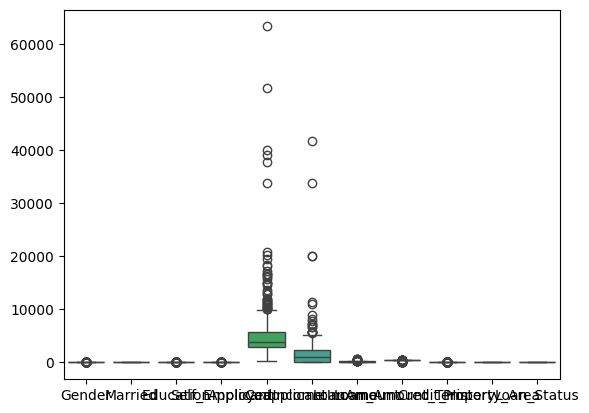

In [34]:
sns.boxplot(df)

<Axes: ylabel='Gender'>

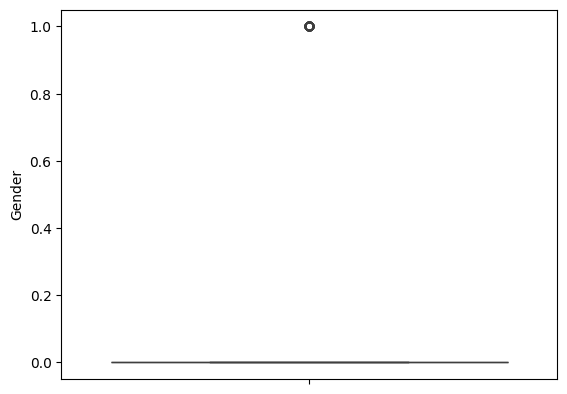

In [35]:
sns.boxplot(df['Gender'])

In [36]:
upper_limit=df['Gender'].quantile(0.70)
upper_limit

0.0

In [37]:
lower_limit=df['Gender'].quantile(0.30)
lower_limit

0.0

In [38]:
new_df=df[(df['Gender']<=0.0)&(df['Gender']>=0.0)]

In [39]:
new_df['Gender'].describe()

count    338.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Gender, dtype: float64

<Axes: ylabel='Gender'>

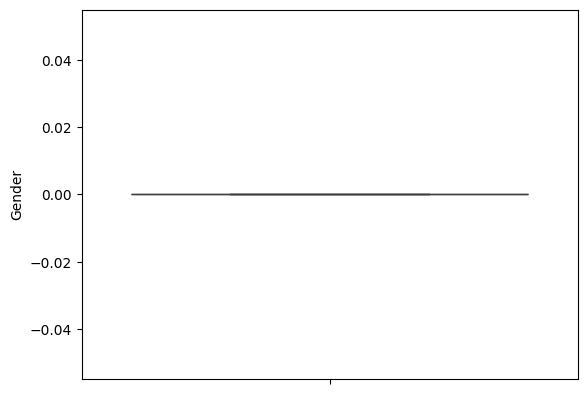

In [40]:
sns.boxplot(new_df['Gender'])

<Axes: ylabel='Married'>

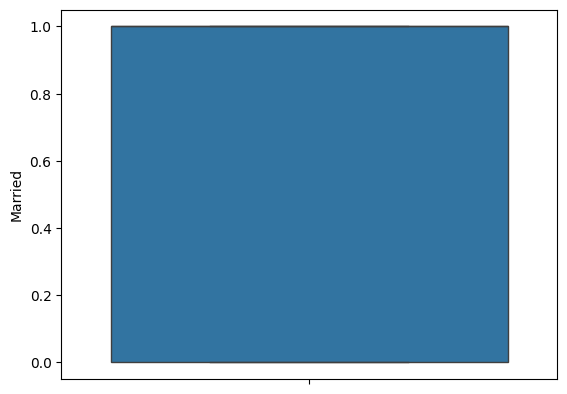

In [41]:
sns.boxplot(df['Married'])

<Axes: ylabel='Education'>

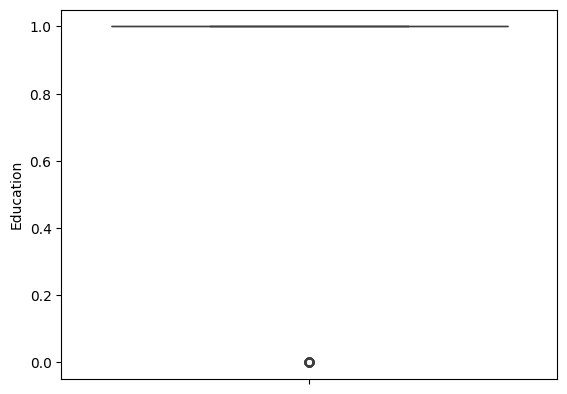

In [42]:
sns.boxplot(df['Education'])

In [43]:
upper_limit=df['Education'].quantile(0.60)
upper_limit

1.0

In [44]:
lower_limit=df['Education'].quantile(0.40)
lower_limit

1.0

In [45]:
new_df=df[(df['Education']<=1.0)&(df['Education']>=1.0)]

In [46]:
new_df['Education'].describe()

count    349.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Education, dtype: float64

<Axes: ylabel='Education'>

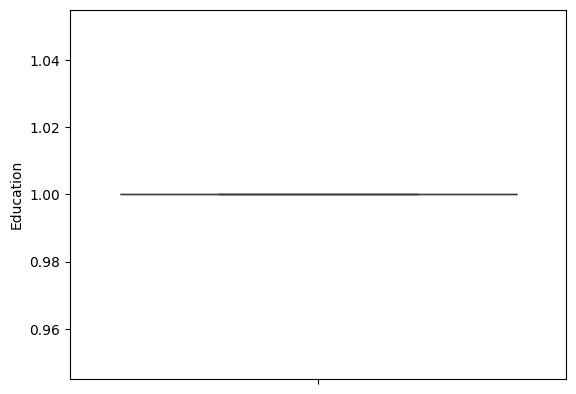

In [47]:
sns.boxplot(new_df['Education'])

<Axes: ylabel='Self_Employed'>

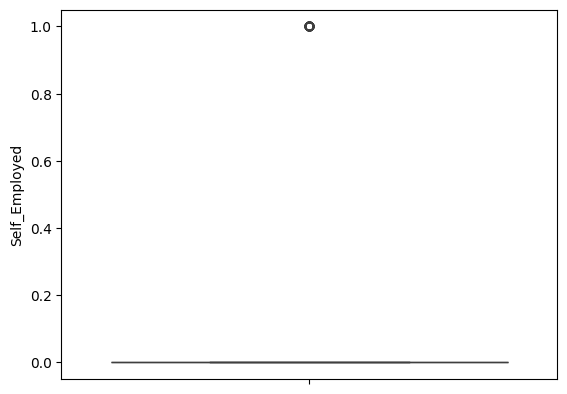

In [48]:
sns.boxplot(df['Self_Employed'])

In [49]:
upper_limit=df['Self_Employed'].quantile(0.60)
upper_limit

0.0

In [50]:
lower_limit=df['Self_Employed'].quantile(0.40)
lower_limit

0.0

In [51]:
new_df=df[(df['Self_Employed']<=1.0)&(df['Self_Employed']>=1.0)]

In [52]:
new_df['Self_Employed'].describe()

count    56.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Self_Employed, dtype: float64

<Axes: ylabel='Self_Employed'>

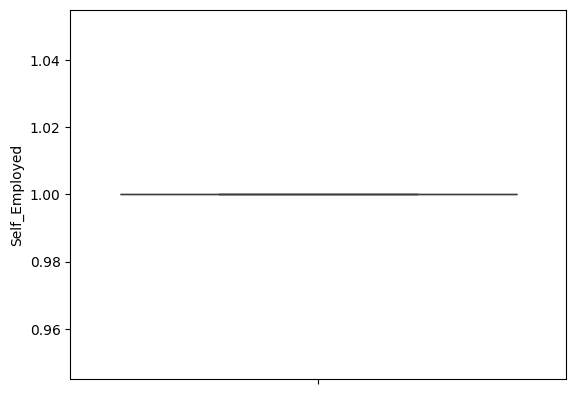

In [53]:
sns.boxplot(new_df['Self_Employed'])

<Axes: ylabel='ApplicantIncome'>

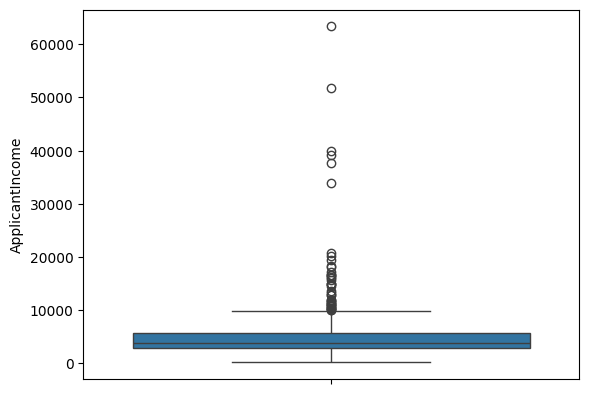

In [54]:
sns.boxplot(df['ApplicantIncome'])

In [55]:
upper_limit=df['ApplicantIncome'].mean()+3*df['ApplicantIncome'].std()
lower_limit=df['ApplicantIncome'].mean()-3*df['ApplicantIncome'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 22790.935157929882
lower limit: -12107.978836090799


In [56]:
#Finding Outliers
df.loc[(df['ApplicantIncome']>upper_limit)| (df['ApplicantIncome']<lower_limit)]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,0.0,1.0,1.0,0.0,39999.0,0.0,600.0,180.0,0.0,1.0,1
171,NaN,1.0,1.0,0.0,51763.0,0.0,700.0,300.0,1.0,0.0,1
183,0.0,1.0,1.0,0.0,33846.0,0.0,260.0,360.0,1.0,1.0,0
185,0.0,1.0,1.0,1.0,39147.0,4750.0,120.0,360.0,1.0,1.0,1
333,0.0,1.0,1.0,NaN,63337.0,0.0,490.0,180.0,1.0,0.0,1
443,0.0,0.0,1.0,0.0,37719.0,0.0,152.0,360.0,1.0,1.0,1


In [57]:
#Trimming the data i.e delete the outliers
new_df = df.loc[(df['ApplicantIncome'] < upper_limit) & (df['ApplicantIncome'] > lower_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('Outliers:',len(df)-len(new_df))

old data: 435
new data: 429
Outliers: 6


<Axes: ylabel='ApplicantIncome'>

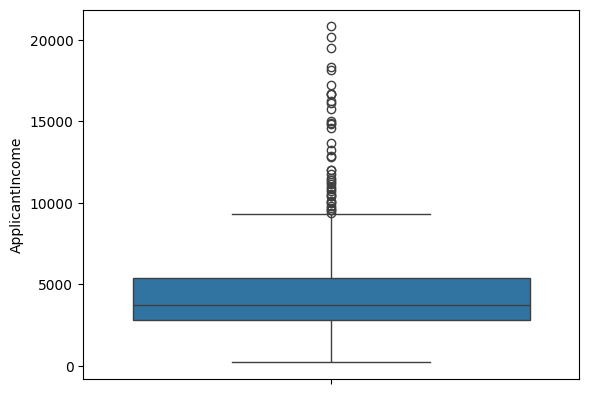

In [58]:
sns.boxplot(new_df['ApplicantIncome'])

In [59]:
upper_limit=df['ApplicantIncome'].quantile(0.60)
upper_limit

4300.4

In [60]:
lower_limit=df['ApplicantIncome'].quantile(0.40)
lower_limit

3322.0

In [61]:
new_df=df[(df['ApplicantIncome']<=4300.0)&(df['ApplicantIncome']>=3322.0)]

<Axes: ylabel='ApplicantIncome'>

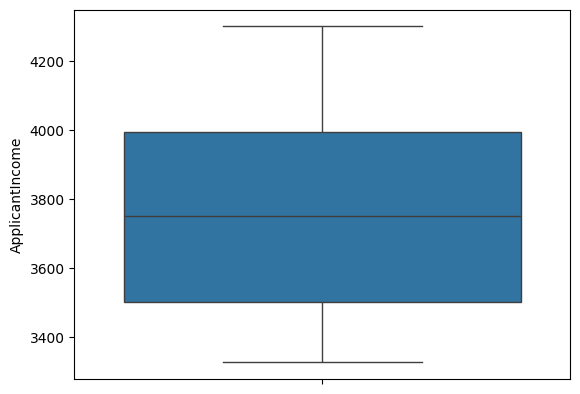

In [62]:
sns.boxplot(new_df['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

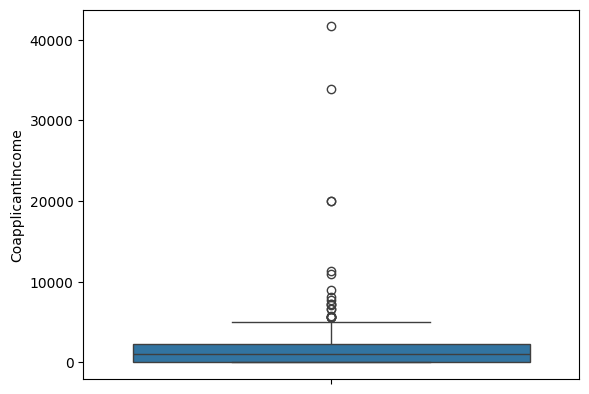

In [63]:
sns.boxplot(df['CoapplicantIncome'])

In [64]:
upper_limit=df['CoapplicantIncome'].mean()+3*df['CoapplicantIncome'].std()
lower_limit=df['CoapplicantIncome'].mean()-3*df['CoapplicantIncome'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 11464.488469174648
lower limit: -8241.988239345683


In [65]:
upper_limit=df['CoapplicantIncome'].quantile(0.60)
upper_limit

1625.0

In [66]:
lower_limit=df['CoapplicantIncome'].quantile(0.40)
lower_limit

0.0

In [67]:
new_df=df[(df['CoapplicantIncome']<=1625.0)&(df['CoapplicantIncome']>=0.0)]

<Axes: ylabel='CoapplicantIncome'>

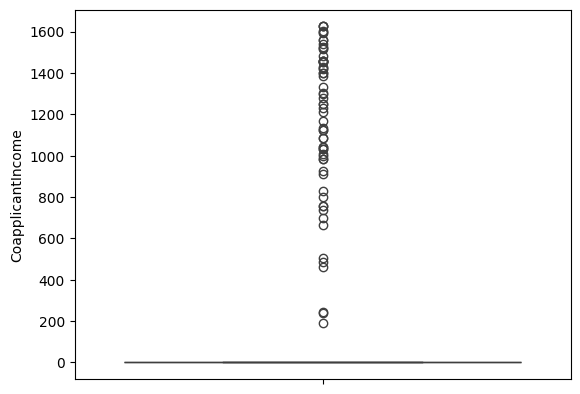

In [68]:
sns.boxplot(new_df['CoapplicantIncome'])

In [69]:
upper_limit=df['ApplicantIncome'].mean()+3*df['ApplicantIncome'].std()
lower_limit=df['ApplicantIncome'].mean()-3*df['ApplicantIncome'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 22790.935157929882
lower limit: -12107.978836090799


In [70]:
#Finding Outliers
df.loc[(df['CoapplicantIncome']>upper_limit)| (df['CoapplicantIncome']<lower_limit)]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,0.0,0.0,1.0,0.0,1836.0,33837.0,90.0,360.0,1.0,0.0,0
600,1.0,0.0,1.0,NaN,416.0,41667.0,350.0,180.0,0.0,0.0,0


In [71]:
#Trimming the data i.e delete the outliers
new_df = df.loc[(df['CoapplicantIncome'] < upper_limit) & (df['CoapplicantIncome'] > lower_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('Outliers:',len(df)-len(new_df))

old data: 435
new data: 433
Outliers: 2


<Axes: ylabel='CoapplicantIncome'>

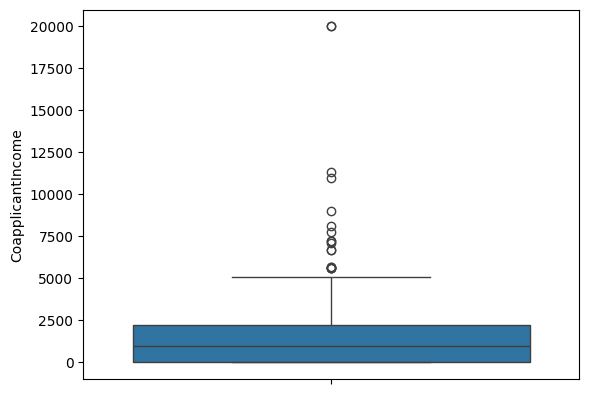

In [72]:
sns.boxplot(new_df['CoapplicantIncome'])

In [73]:
upper_limit=df['CoapplicantIncome'].mean()+3*df['CoapplicantIncome'].std()
lower_limit=df['CoapplicantIncome'].mean()-3*df['CoapplicantIncome'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 11464.488469174648
lower limit: -8241.988239345683


In [74]:
upper_limit=df['CoapplicantIncome'].quantile(0.90)
upper_limit

3566.2000000000007

In [75]:
lower_limit=df['CoapplicantIncome'].quantile(0.10)
lower_limit

0.0

In [76]:
new_df=df[(df['CoapplicantIncome']<=3566.0)&(df['CoapplicantIncome']>=0.0)]

<Axes: ylabel='CoapplicantIncome'>

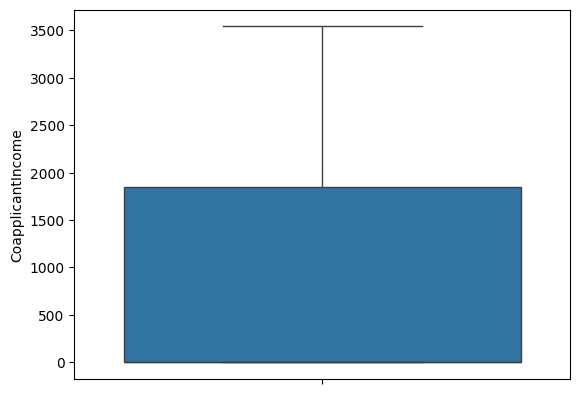

In [77]:
sns.boxplot(new_df['CoapplicantIncome'])

In [78]:
y=df['Loan_Status']
X=df.drop (columns=['Loan_Status'])


In [79]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,1.0,0.0,5849.0,0.0,0.0,360.0,1.0,0.0
2,0.0,1.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0
3,0.0,1.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0
4,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0
5,0.0,1.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
605,0.0,1.0,0.0,0.0,2400.0,3800.0,0.0,180.0,1.0,0.0
606,0.0,1.0,1.0,0.0,3400.0,2500.0,173.0,360.0,1.0,1.0
611,0.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,0.0
612,0.0,1.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,0.0


In [80]:
y

0      1
2      1
3      1
4      1
5      1
      ..
605    0
606    1
611    1
612    1
613    0
Name: Loan_Status, Length: 435, dtype: int64

In [81]:
import pandas as pd

# Assuming 'df' is your DataFrame
df_cleaned = df.dropna(axis=0, how='any', subset=df.columns)


In [82]:
print(X.shape)
print(y.shape)

(435, 10)
(435,)


In [83]:
missing_values = df.isnull().sum()

In [84]:
print(missing_values)

Gender                9
Married               3
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [88]:
import pandas as pd

# Assuming 'df' is your DataFrame
df_cleaned_rows = df.dropna(axis=0)


In [89]:
import pandas as pd

# Assuming 'df' is your DataFrame
df_cleaned_columns = df.dropna(axis=1)


In [119]:
from sklearn.impute import SimpleImputer

# Assuming 'X' is your input data
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_imputed = imputer.fit_transform(X)


In [120]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Assuming 'X' and 'y' are your input features and target variable
clf = HistGradientBoostingClassifier()
clf.fit(X, y)


HistGradientBoostingClassifier()

In [121]:
X_cleaned = X.dropna()
y_cleaned = y[X.index.isin(X_cleaned.index)]  # Assuming 'y' is your target variable


In [133]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'X' and 'y' are your input features and target variable
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression())
])

pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', LogisticRegression())])

In [134]:
y_pred=pipeline.predict(X_test)

In [135]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7931034482758621


In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)

Confusion Matrix:
 [[12 13]
 [ 5 57]]
